<a href="https://colab.research.google.com/github/jamesjulius-02/Logistics-Regression-Implemenation/blob/main/Logistic_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
# Example data
data = {

'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
'Passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df = pd.DataFrame(data)

# Independent variable (feature) and dependent variable (target)
X =df[['Hours_Studied']]
y = df['Passed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [12]:
import numpy as np

# Function to predict whether a student will pass or fail based on hours studied
def predict_pass_fail(hours):
    hours_array = np.array([[hours]])  # Convert the input hours to a 2D array
    prediction = model.predict(hours_array)[0]  # Predict class (0 or 1)
    prediction_prob = model.predict_proba(hours_array)[0][1]  # Predict probability of passing
    return prediction, prediction_prob

# User input for hours studied
try:
    user_input = float(input("Enter the number of hours studied: "))
    prediction, prediction_prob = predict_pass_fail(user_input)
    result = "Pass" if prediction == 1 else "Fail"
    print(f"The predicted result for studying {user_input} hours is: {result} (Probability of passing: {prediction_prob:.2f})")
except ValueError:
    print("Please enter a valid number for the hours studied.")


Enter the number of hours studied: 12
The predicted result for studying 12.0 hours is: Pass (Probability of passing: 1.00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Assuming you've trained a model and have X_test and y_test
y_pred = model.predict(X_test)  # Make predictions on the test data

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# For ROC-AUC, you'll need probability estimates, not just class labels
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Assuming binary classification
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC-AUC: {roc_auc:.2f}")



Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

ROC-AUC: 1.00


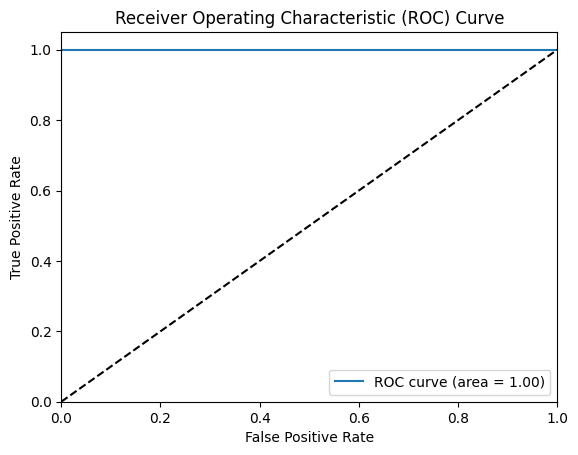

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have y_test (true labels) and y_pred_prob (predicted probabilities)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()